# Loan Application Status Prediction

### Problem Statement:

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. Here "Loan_Status" is our target variable.

We have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. Hence this problem statement tell us that the target has two classes Yes and No so it is a **"Classification problem"**.

# Importing necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Importing the dataset

In [3]:
# Reading the csv file into dataframe
df = pd.read_csv("loan_prediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


The dataset contains both numerical and categorical columns. This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. Here "Loan_Status" is our target variable which has two classes "Yes" and "No". So it will be termed as **Classification problem**.

In [5]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Displaying top 5 rows of the dataset.

# Exploratory Data Analysis(EDA)

In [6]:
# Checking the dimension of dataset
df.shape

(614, 13)

The dataset contains 614 rows and 13 columns which includes both categorical and numerical data.

In [8]:
# Checking the type of dataset
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

The dataset contains object, integer and float type of data. We need to encode the Categorical data for futher preprocessing. 

In [11]:
# Checking for categorical columns
categorical_col = []
for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        categorical_col.append(i)
print(categorical_col)

['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


These are the categorical columns in the given dataset.

In [12]:
# Checking for numerical columns
numerical_col = []
for i in df.dtypes.index:
    if df.dtypes[i] != 'object':
        numerical_col.append(i)
print(numerical_col)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


These are the numerical columns present in the dataset.

In [13]:
# To get good overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


This gives the information about the dataset which includes indexing type, column type, no-null values and memory usage. 

In [14]:
# Checking the number of unique values in each column
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

These are the unique values present in the columns.

Lets check the list of value counts in each columns to find if there are any unexpected or corrupted data entries.

In [15]:
# Checking the value counts of each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

LP002936    1
LP001715    1
LP001319    1
LP002690    1
LP001289    1
           ..
LP002840    1
LP002648    1
LP002366    1
LP002615    1
LP002367    1
Name: Loan_ID, Length: 614, dtype: int64


Male      489
Female    112
Name: Gender, dtype: int64


Yes    398
No     213
Name: Married, dtype: int64


0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


Graduate        480
Not Graduate    134
Name: Education, dtype: int64


No     500
Yes     82
Name: Self_Employed, dtype: int64


2500    9
6000    6
2600    6
4583    6
4166    5
       ..
5503    1
3450    1
2425    1
2423    1
4095    1
Name: ApplicantIncome, Length: 505, dtype: int64


0.0       273
2500.0      5
2083.0      5
1666.0      5
1625.0      3
         ... 
2365.0      1
1695.0      1
2466.0      1
2375.0      1
1700.0      1
Name: CoapplicantIncome, Length: 287, dtype: int64


120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
211.0     1
250.0     1
62.0      1
85.0      1
436

These are the list of value counts present in each column.


The column Loan_ID is the unique ID given to the applicants also it has no significance in the prediction. So lets drop this column.

In [16]:
# Removing irrelevant column
df.drop("Loan_ID",axis=1,inplace=True)

In [17]:
# Checking for null values in the dataset
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

We can observe the missing values in the coolumns-
* Gender
* Married
* Dependents
* Self_Employed
* LoanAmount
* Loan_Amount_Term
* Credit_History

We can fill these missing values using imputation techniques

<AxesSubplot:>

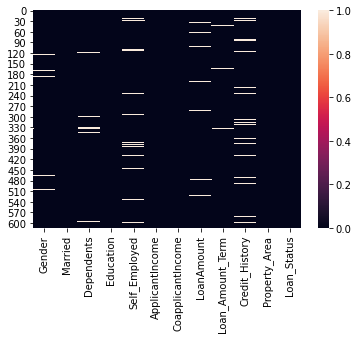

In [19]:
# Lets visualize null values clearly
sns.heatmap(df.isnull())

The white lines in the heatmap represents the missing values in the data.

In [20]:
df.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
dtype: float64

### Treating null values

There are both categorical and numerical columns which have missing values. so we will fill them by using appropriate methods.

The feature Gender,Married,Dependents,Self-Employed,Loan_Amount_Term and Credit_History are seems to be categorical so will fill the missing values using their mode values.

In [22]:
# Let's check the mode of the categorical colums to fill the null values
print("The mode of Gender is:",df["Gender"].mode())  # we will fill the null values using its mode
print("The mode of Married is:",df["Married"].mode())
print("The mode of Dependents is:",df["Dependents"].mode())
print("The mode of Self_Employed is:",df["Credit_History"].mode())
print("The mode of Loan_Amount_Term is:",df["Loan_Amount_Term"].mode())

The mode of Gender is: 0    Male
dtype: object
The mode of Married is: 0    Yes
dtype: object
The mode of Dependents is: 0    0
dtype: object
The mode of Self_Employed is: 0    1.0
dtype: float64
The mode of Loan_Amount_Term is: 0    360.0
dtype: float64


These are the modes of the categorical columns which contains null values.These are the values which are highly repeated in the columns. The missing values will be replaced by their respective mode values.

In [23]:
# Filling the missing values in Gender by its mode "Male"
df["Gender"] = df["Gender"].fillna(df["Gender"].mode()[0])

# Filling the missing values in Married by its mode "Yes"
df["Married"] = df["Married"].fillna(df["Married"].mode()[0])

# Filling the missing values in Dependents by its mode 0
df["Dependents"] = df["Dependents"].fillna(df["Dependents"].mode()[0])

# Filling the missing valuesin Self_Employed by its mode "No"
df["Self_Employed"] = df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])

# Filling the missing valuesin Gender by its mode "No"
df["Credit_History"] = df["Credit_History"].fillna(df["Credit_History"].mode()[0])

# Filling the missing valuesin Gender by its mode "360"
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0])

So the missing values in the categorical columns are filled using mode method.

In [24]:
# Lets check null values now
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

Lets fill the null values in numerical column i.e. Loan_Amount.

Loan_Amount has continuous data and has outliers and skewness too, so will fill the null values using median.

In [25]:
# Let's check the median values of the numerical column
print("The median of LoanAmount is:", df["LoanAmount"].median())

The median of LoanAmount is: 128.0


In [26]:
# Filling null values in LoanAmount by its median value
df["LoanAmount"] = df["LoanAmount"].fillna(df["LoanAmount"].median())

We have filled null values in all the columns, lets chk it.

In [27]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Now the data has no missing values.

<AxesSubplot:>

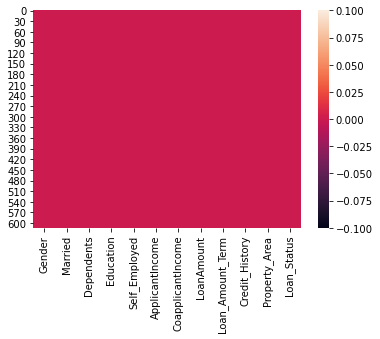

In [28]:
#Lets visualize the null values clearly
sns.heatmap(df.isnull())

We can visualize no null values.

In [30]:
# Checking columns in the dataset
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

These are the columns present in the dataset.

In [32]:
# Checking the uniqueness of label
df["Loan_Status"].unique()

array(['Y', 'N'], dtype=object)

These are the unique values present in the target column

In [33]:
# Checking the list of counts in target columns
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

* We have two counts in Loan_Status namely "Y" and "N". Here "Y" stands for "Yes" means that the Loan of the applicant is approved and "N" stands for "No" i.e the loan of the applicant is not approved.
* Here loan approved has high counts than the loan not approved.

In [34]:
# Checking whether the dataset contains any space
df.loc[df["Loan_Status"] == " "]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


We can see there are no spaces in the dataset.

# Description of Dataset

In [35]:
# Statistical summary of dataset
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


This gives the statistical information of the dataset. The summary of this dataset looks perfect since there is no negative/ invalid values present. It gives the summary of numerical data.

From the above description we can observe the following things

* The counts of all the columns are same which means there are no null values present in the dataset.
* The mean value is greater than the median(50%) in ApplicantIncome, CoapplicantIncome, LoanAmount which means they are skewed to right.
* The median is greater than the mean in Loan_Amount_Term and Credit_History which means they are skewed to left.
* There is a huge difference between mean and the standard deviation.
* In summarizing the data we can infer that there is a huge difference in max and 75% percentile means there are huge outliers present in the dataset. We will remove htese outliers using Zscore or IQR method in later part.

# Data Visualization

## Univariate Analysis

Y    422
N    192
Name: Loan_Status, dtype: int64


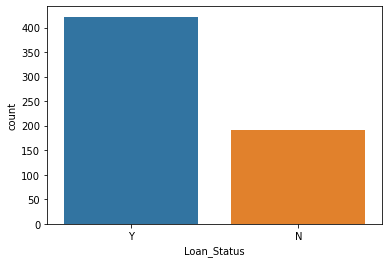

In [37]:
# Visualizing the loan approval status
print(df["Loan_Status"].value_counts())
sns.countplot(df["Loan_Status"])
plt.show()

* The count of "Y" is maximum caompare to "N" that means total 422 applicants get their loan and only 192 applicants gets denied.
* We can also notice the imbalance of the class, and it needs to get balance using over_sampling method to increase the instances of minority class.

Male      502
Female    112
Name: Gender, dtype: int64


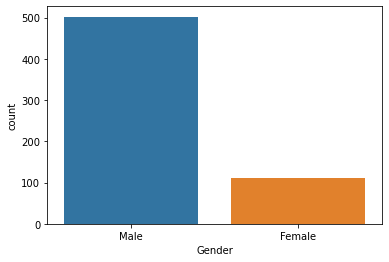

In [38]:
# Visualizing the count of applicants Gender
print(df["Gender"].value_counts())
sns.countplot(df["Gender"])
plt.show()

There are more number of Male applicants than Female applicants. The total number of male applicants are 502 whereas female numbers are just 112.

Yes    401
No     213
Name: Married, dtype: int64


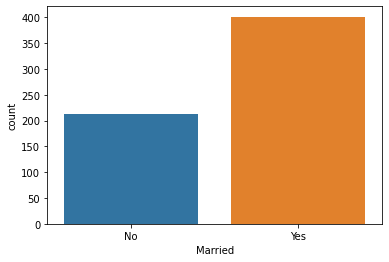

In [39]:
# Visualizing the count of marital status of the applicants
print(df["Married"].value_counts())
sns.countplot(df["Married"])
plt.show()

The number of married applicants who have applied for loan are 401 whereas the unmarried applicants are 213.

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


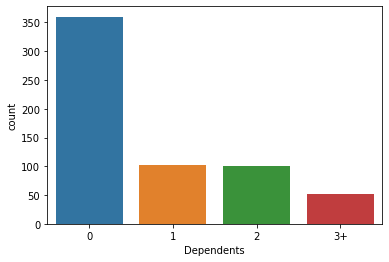

In [40]:
# Visualizing the count of Dependents 
print(df["Dependents"].value_counts())
sns.countplot(df["Dependents"])
plt.show()

The applicants who have 0 dependents have high counts and the applicants having more than 3 dependents counts are very less.

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


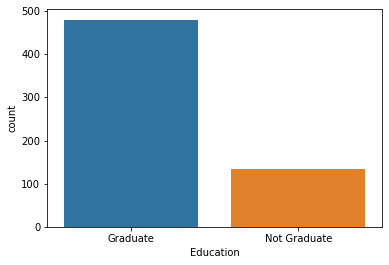

In [41]:
# Visualizing the count of Education of the applicants
print(df["Education"].value_counts())
sns.countplot(df["Education"])
plt.show()

The count of Graduate applicants is high in counts means the maximum number of Graduated applicants are applying for the loan.

No     532
Yes     82
Name: Self_Employed, dtype: int64


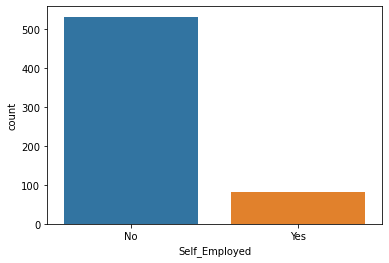

In [42]:
# Visualizing the count of Self_Employed applicants
print(df["Self_Employed"].value_counts())
sns.countplot(df["Self_Employed"])
plt.show()

Most of the applicants or not self employed that means they might working in the public sectors and only 82 applicants are self employed and running their own bussiness.

1.0    525
0.0     89
Name: Credit_History, dtype: int64


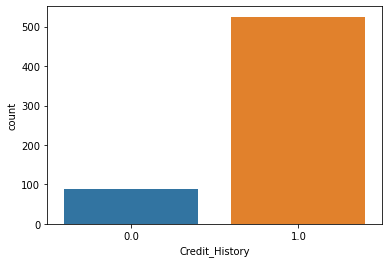

In [44]:
# Visualizing the count of Credit_History of the applicants
print(df["Credit_History"].value_counts())
sns.countplot(df["Credit_History"])
plt.show()

Most of the applicants who have credit history 1 are high in numbers.

# Distribution of Skewness

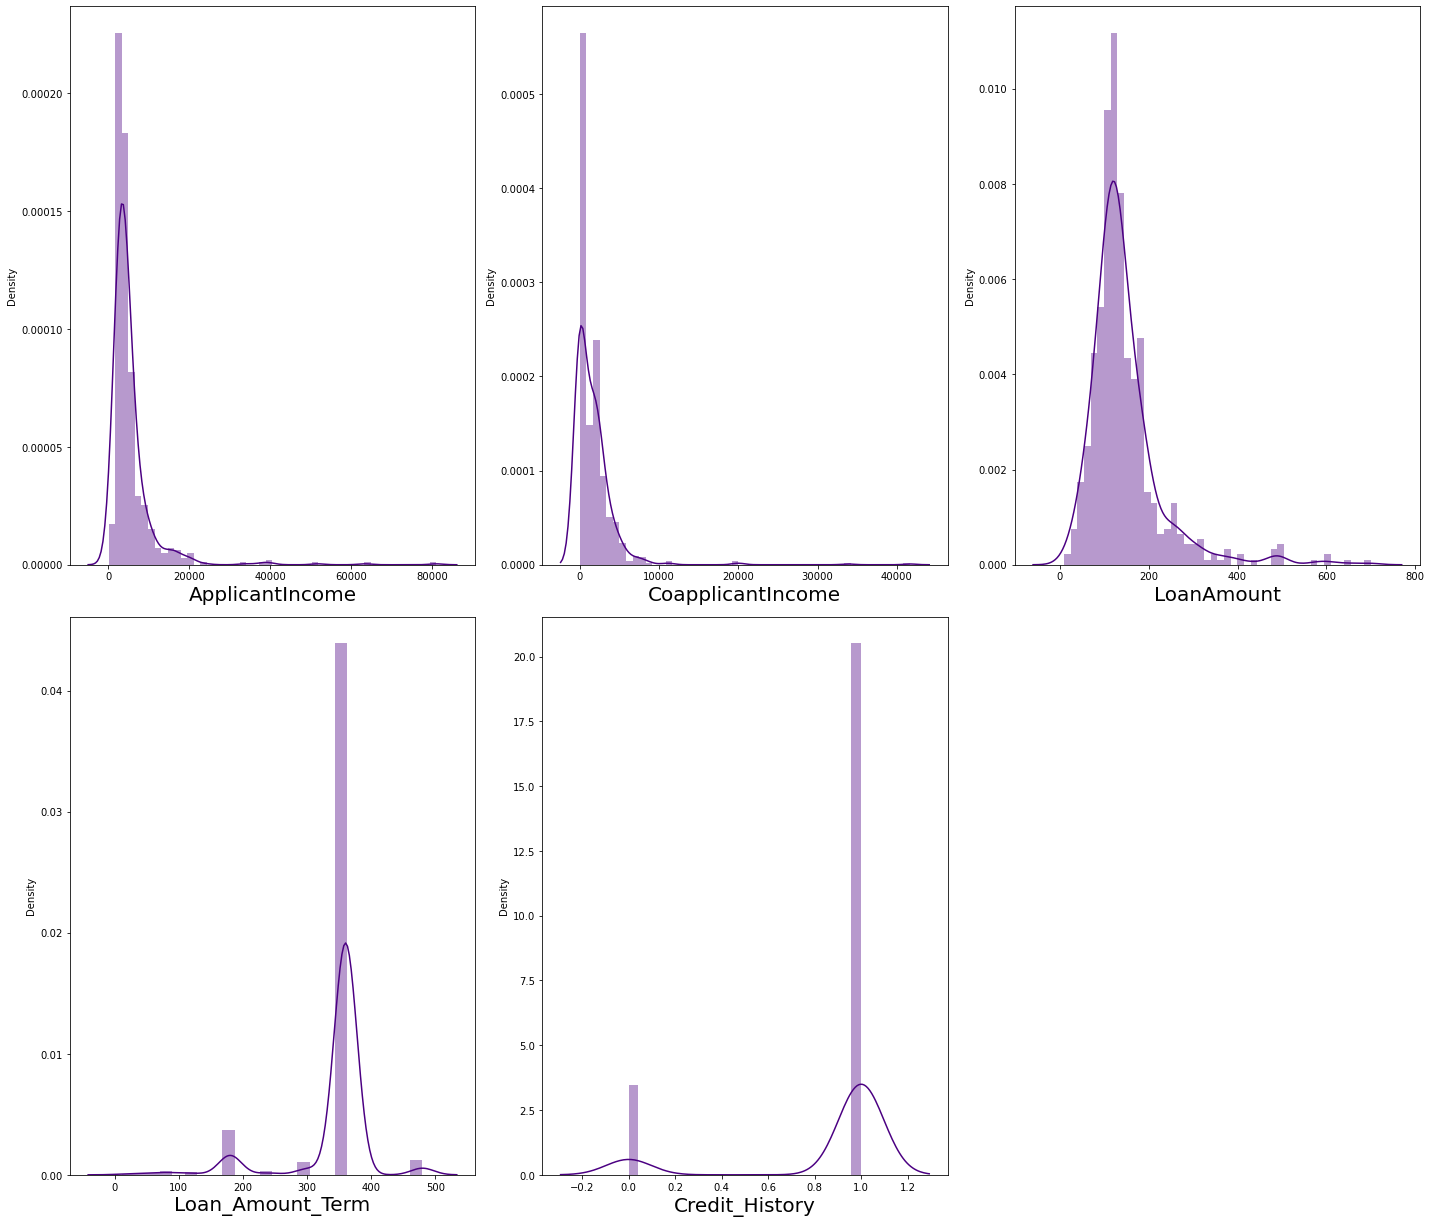

In [46]:
# Checking how the data has been distriubted in each column
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column],color="indigo")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

From the above distribution plot we can observe

* The data is not normally distributed in any of the columns.
* The mean value is greater than the median in ApplicantIncome, CoapplicantIncome, LoanAmount and TotalIncome which means they are skewed to right.
* The median is greater than the mean in Loan_Amount_Term and Credit_History columns which means they are skewed to left. We will remove these skewness using appripriate methods in the later part.

## Bivariate Analysis

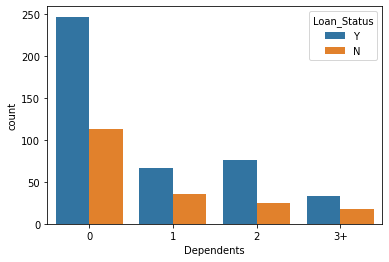

In [48]:
#Visualizing count of Dependents of the applicants on the basis of loan status
sns.countplot(df["Dependents"],hue=df["Loan_Status"])
plt.show()

* The count of 0 dependents is high which means most of the applicants have no dependents. Having dependents means having commitments. The 3+ dependents means more than 3 applicants have dependents.
* The applicants who have dependents 0 are more likely to get their loan approved.

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


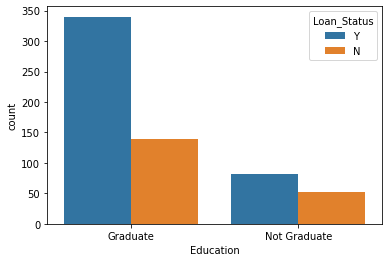

In [50]:
#Visualizing count of Education of the applicants
print(df["Education"].value_counts())
sns.countplot(df["Education"],hue=df["Loan_Status"])
plt.show()

Mosrt of the applicants who have applied for loan are graduated and only few are not graduated. Also the applicants have tendency of tendency of getting loans rather than who are not.

No     532
Yes     82
Name: Self_Employed, dtype: int64


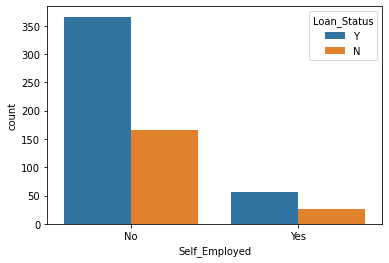

In [51]:
#Visualizing whether the applicants are Self_Employed or not 
print(df["Self_Employed"].value_counts())
sns.countplot(df["Self_Employed"],hue=df["Loan_Status"])
plt.show()

* Most of the applicants are not Self_Employed means they are working in public sectors and only few of the applicants are self_employed.
* The applicants who are not self_employed have the tendency of getting thier loans than self employed applicants.

1.0    525
0.0     89
Name: Credit_History, dtype: int64


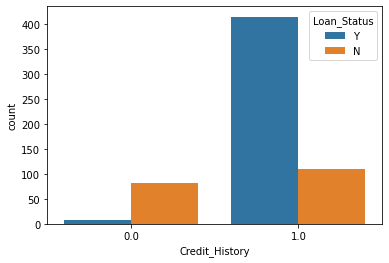

In [52]:
#Visualizing the count of the Credit_History of the applicants
print(df["Credit_History"].value_counts())
sns.countplot(df["Credit_History"], hue=df["Loan_Status"])
plt.show()

The credit_history gives the information of the applicants who took loan in the past have cleared or not. Here we can notice the applicants who have credit history 1 have high counts which means most of the loan applicants have cleared their past loans and only few of them have to clear it.


Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


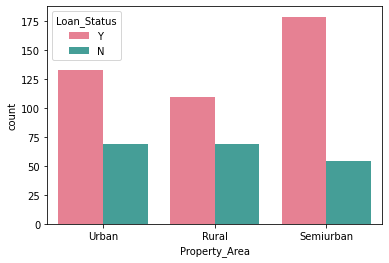

In [53]:
#Visualizing Property_Area of the applicants
print(df["Property_Area"].value_counts())
sns.countplot(df["Property_Area"],hue=df["Loan_Status"],palette="husl")
plt.show()

Most of the applicants from the Semiurban have applied for loan followed by Urban area. Also they have more chances of getting their loan approval.

Male      502
Female    112
Name: Gender, dtype: int64


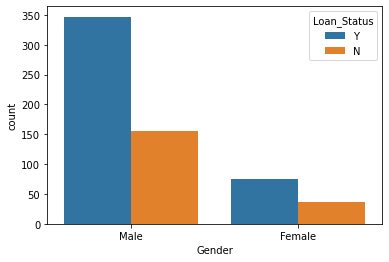

In [54]:
#Visualizing Gender of the applicants
print(df["Gender"].value_counts())
sns.countplot(df["Gender"],hue=df["Loan_Status"])
plt.show()

The male applicants are more than female applicants.

Yes    401
No     213
Name: Married, dtype: int64


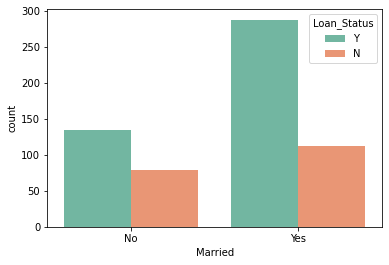

In [55]:
#Visualizing Married status of the applicants
print(df["Married"].value_counts())
sns.countplot(df["Married"],hue=df["Loan_Status"],palette="Set2")
plt.show()

The married applicants are more than unmarried applicants.

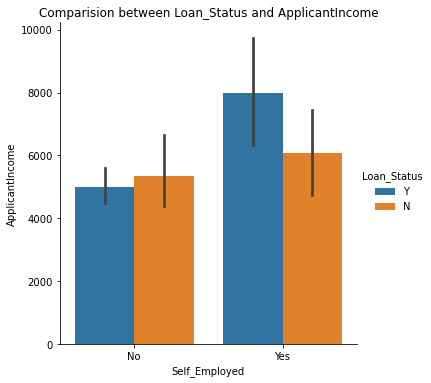

In [58]:
# Cheking relation between Self_Employed and ApplicantIncome
sns.catplot(x='Self_Employed',y="ApplicantIncome",data=df,kind="bar",hue='Loan_Status',)
plt.title("Comparision between Loan_Status and ApplicantIncome")
plt.show()

The applicants whose loans got approved have high average income and have their own business i.e they are self employed

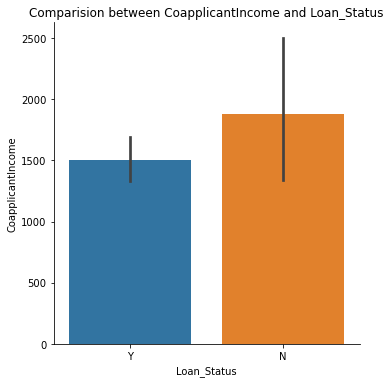

In [59]:
# Checking relation between Loan_Status and CoapplicantIncome
sns.catplot(x='Loan_Status',y="CoapplicantIncome",data=df,kind="bar")
plt.title("Comparision between CoapplicantIncome and Loan_Status")
plt.show()

The coapplicants who got loan have average income.

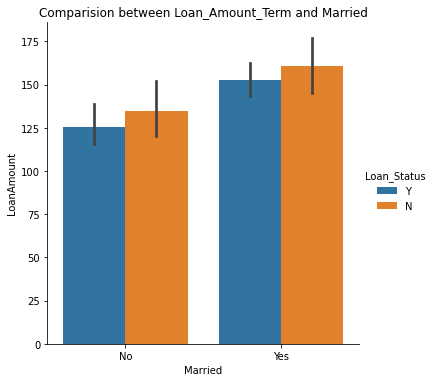

In [60]:
# Checking relation between LoanAmount and Married on the basis of target
sns.catplot(x="Married",y='LoanAmount',data=df,kind="bar",hue="Loan_Status")
plt.title("Comparision between Loan_Amount_Term and Married")
plt.show()

The applicants who got married and have average loan amount have more tendency of getting loan.

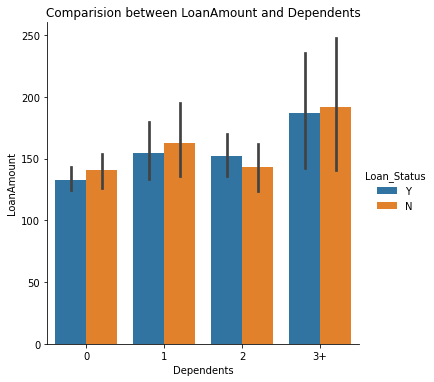

In [64]:
# Checking relation between Loan_Amount and Dependents on the basis of target
sns.catplot(x='Dependents',y="LoanAmount",data=df,kind="bar",hue="Loan_Status")
plt.title("Comparision between LoanAmount and Dependents")
plt.show()

The applicants who have more than 3 dependents with average loan amount have got thier loan approved.

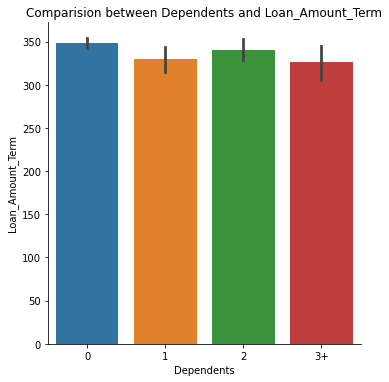

In [65]:
# Checking relation between Loan_Amount_Term and Dependents
sns.catplot(x="Dependents",y='Loan_Amount_Term',data=df,kind="bar")
plt.title("Comparision between Dependents and Loan_Amount_Term")
plt.show()

The applicants 0 dependents have high Loan amount term followed by the dependent 2.

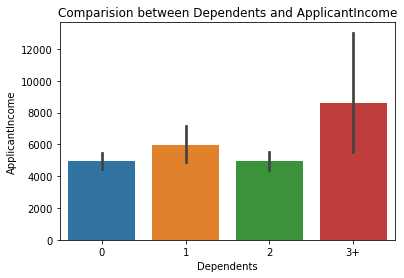

In [67]:
# let's check the applicant income as per Dependents
sns.barplot(x="Dependents",y="ApplicantIncome",data=df)
plt.title("Comparision between Dependents and ApplicantIncome")
plt.show()

The applicants dependents more than 3 has high average income and dependents with 2 has less income

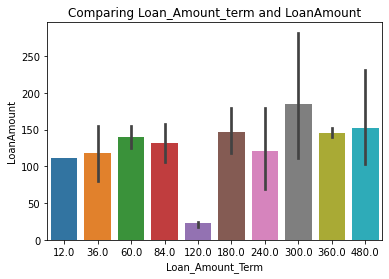

In [68]:
#Comparing Loan_Amount_term and LoanAmount
sns.barplot(x="Loan_Amount_Term",y="LoanAmount",data=df)
plt.title("Comparing Loan_Amount_term and LoanAmount")
plt.show()

The loan amount term 300.0 is high with loan amount compared to others.

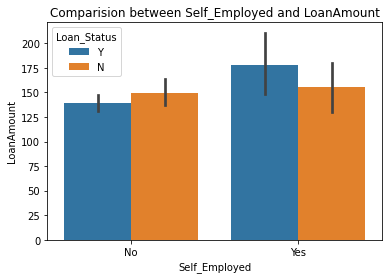

In [69]:
# let's compare the loan amount with self employed
sns.barplot(x="Self_Employed",y="LoanAmount",data=df,hue="Loan_Status")
plt.title("Comparision between Self_Employed and LoanAmount")
plt.show()

The average loan amount demanded by the self employed is more compare to the other also the loan approval for self employes applicants with avarage loan amount is high compare to the applicants who are not self employed.

# Multivariate Analysis

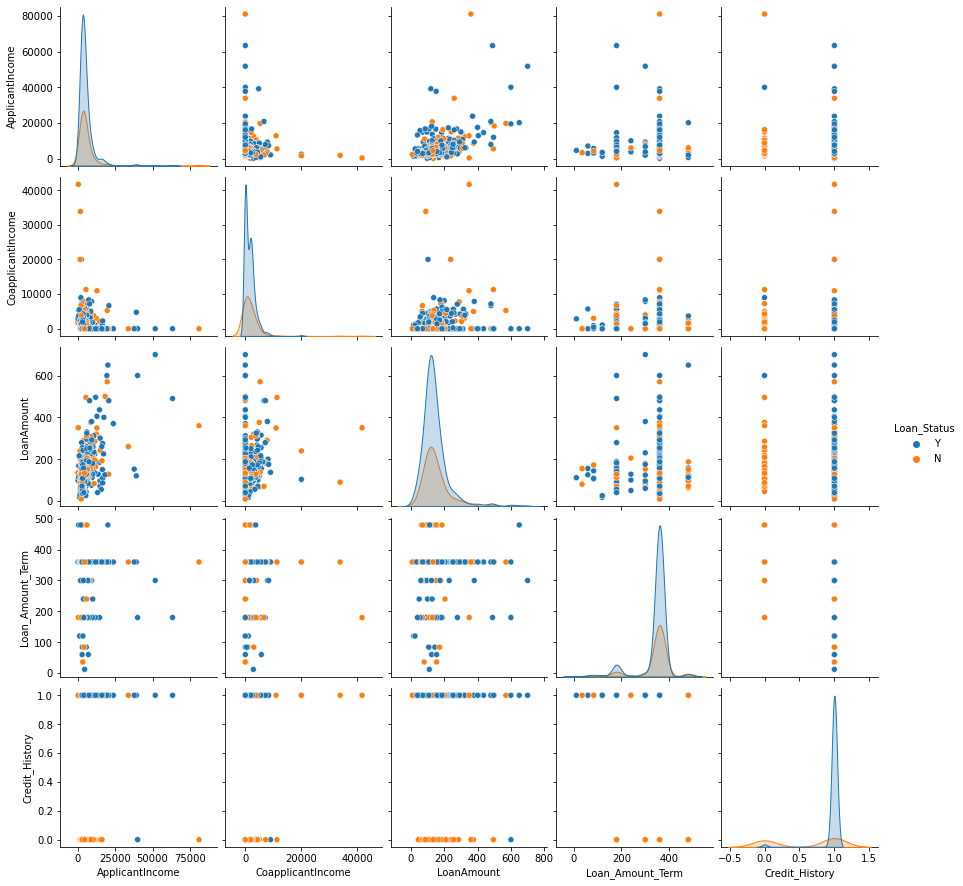

In [70]:
# Checking the pairwise relation in the dataset.
sns.pairplot(df,hue="Loan_Status")

* This pair plot gives the pairwise relation between the columns which is plotted on the basis of target variable "Loan_Status". Here we can observe the relation between the features and label.
* We can observe the linear relationship between ApplicantIncome and LoanAmount, CoapplicantIncome and LoanAmount, ApplicantIncome and TotalIncome.
* We can also observe the correlation in some columns also there are outliers present in some of the columns.

# Identifying the outliers

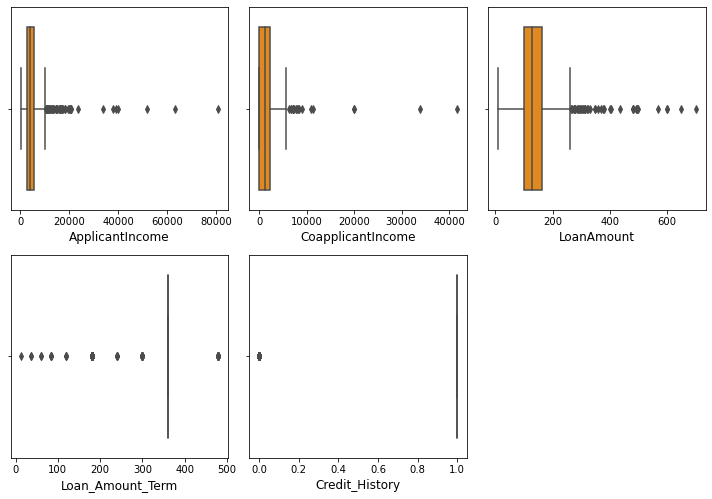

In [72]:
# Identifying the outliers present in numerical columns using boxplo

plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column],color="darkorange")
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()

We can observe the outliers present in all the columns. But the columns Credit history has only two unique values so no need to remove outliers in this column. Let's remove outliers in remaining columns them using Zscore method.

# Removing outliers

In [74]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### Zscore method

In [75]:
# numerical columns containing outliers
features = df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']]
from scipy.stats import zscore
z=np.abs(zscore(features))
z

array([[0.07299082, 0.55448733, 0.21124125, 0.2732313 ],
       [0.13441195, 0.03873155, 0.21124125, 0.2732313 ],
       [0.39374734, 0.55448733, 0.94899647, 0.2732313 ],
       ...,
       [0.43717437, 0.47240418, 1.27616847, 0.2732313 ],
       [0.35706382, 0.55448733, 0.49081614, 0.2732313 ],
       [0.13441195, 0.55448733, 0.15174486, 0.2732313 ]])

Now we have removed the outliers, let's check the dataloss by creating new dataframe.

In [76]:
# Creating new dataframe
new_df = df[(z<3).all(axis=1)] 
new_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y



This is the new dataframe after removing the outliers. Here we have removed the outliers whose Zscore is less than 3.

In [77]:
# Checking hte dimensions of both dataframes
print(df.shape)
print(new_df.shape)

(614, 12)
(577, 12)


##### Data loss percent

In [78]:
# Checking the data loss after removing outliers
loss = (614-577)/614*100
loss

6.026058631921824

The data loss using zscore is 6.02%. Let check data loss using IQR method

# IQR(InterQuantileRange)

In [79]:
# 1st quantile
Q1= features.quantile(0.25)

# 3rd quantile
Q3 = features.quantile(0.75)

# IQR
IQR = Q3-Q1
df1 = df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]

In [80]:
df1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
608,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [81]:
df1.shape

(459, 12)

##### Data loss percent

In [82]:
loss = (614-459)/614*100
loss

25.2442996742671

Using IQR method the data loss is 25%. So ww will consider **Zscore method**.

# Checking for Skewness

In [83]:
# Checking the skewness
df.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.743053
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
dtype: float64

The skewness is present in all the above coloumns. Here the columns Credit_History and Loan_Amount_Term have categorical data, so no need to remove skewness.

# Removing Skewness using yeo-johnson method

In [85]:
# Removing skewness using yeo-johnson  method to get better prediction
skew = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [86]:
new_df[skew] = scaler.fit_transform(new_df[skew].values)
new_df[skew].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,0.681780,-1.122446,0.000771
1,0.234783,0.744117,0.000771
2,-0.527201,-1.122446,-1.437336
3,-0.791972,0.895786,-0.153545
4,0.728848,-1.122446,0.238260


In [87]:
# Checking skewness after using yeo-johnson ethod
new_df.skew()

ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.048425
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
dtype: float64

So the skewness has been removed using yeo-johnson method.

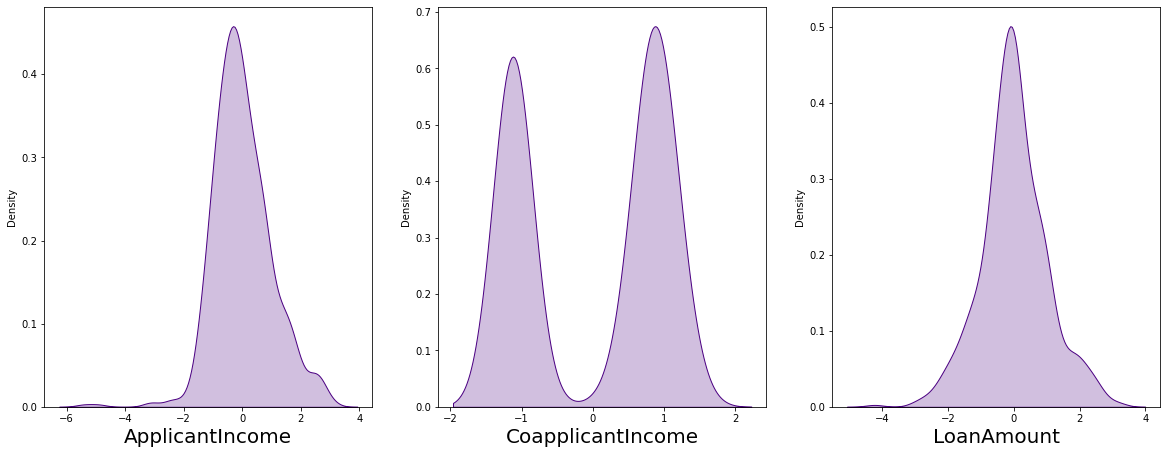

In [88]:
# After removing skewness let's check how the data has been distributed in each column.

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in new_df[skew]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(new_df[column],color='indigo',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

The data is almost normal also we have removed the skewness that we can notice in the above dist plot.

# Encoding the categorical columns using Label Encoding

In [89]:
categorical_col = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

In [90]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()
new_df[categorical_col]= new_df[categorical_col].apply(lbl.fit_transform)

In [91]:
new_df[categorical_col]

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,1,0,0,0,0,2,1
1,1,1,1,0,0,0,0
2,1,1,0,0,1,2,1
3,1,1,0,1,0,2,1
4,1,0,0,0,0,2,1
...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,1
610,1,1,3,0,0,0,1
611,1,1,1,0,0,2,1
612,1,1,2,0,0,2,1


The categorical columns have been converted into numerical columns by using label encoding.

# Correlation

In [93]:
# Checking the correlation between features and the target
cor = new_df.corr()
cor

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.378997,0.188162,0.045696,-0.006207,0.058590,0.234551,0.172146,-0.104983,0.013172,-0.026340,0.017408
Married,0.378997,1.000000,0.329900,0.024817,-0.015779,-0.024783,0.335820,0.181878,-0.127348,0.019308,0.010595,0.089026
Dependents,0.188162,0.329900,1.000000,0.069814,0.044543,0.105994,0.004109,0.131772,-0.087389,-0.020288,0.002327,0.017872
Education,0.045696,0.024817,0.069814,1.000000,-0.007139,-0.176074,0.049739,-0.128715,-0.090523,-0.075217,-0.068596,-0.092658
Self_Employed,-0.006207,-0.015779,0.044543,-0.007139,1.000000,0.212260,-0.087338,0.117218,-0.032914,-0.016390,-0.028253,-0.026525
ApplicantIncome,0.058590,-0.024783,0.105994,-0.176074,0.212260,1.000000,-0.360946,0.432154,-0.069429,0.028825,-0.011364,-0.002484
CoapplicantIncome,0.234551,0.335820,0.004109,0.049739,-0.087338,-0.360946,1.000000,0.200081,0.000951,0.006564,-0.074476,0.079344
LoanAmount,0.172146,0.181878,0.131772,-0.128715,0.117218,0.432154,0.200081,1.000000,0.049057,-0.003626,-0.098090,-0.023609
Loan_Amount_Term,-0.104983,-0.127348,-0.087389,-0.090523,-0.032914,-0.069429,0.000951,0.049057,1.000000,0.027392,-0.057004,-0.020291
Credit_History,0.013172,0.019308,-0.020288,-0.075217,-0.016390,0.028825,0.006564,-0.003626,0.027392,1.000000,-0.008121,0.560936


This gives the correlation between the denpendent and independent variables. We can visualize this by plotting heat map.

<AxesSubplot:>

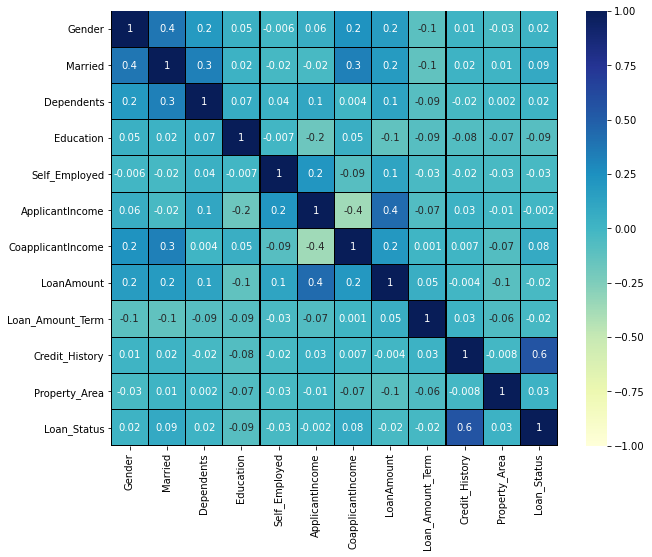

In [96]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(10,8))
sns.heatmap(new_df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="YlGnBu")

This heatmap shows the correlation matrix by visualizing the data. we can observe the relation between one feature to other.

-This heat mapcontains both positive and negative correlation.

* The target column Loan_Status is highly positively correlated with the feature Credit_History.
* The other features have very less correlation with the target column.
* Also we can notice there is no multicollinearity issue in the features. Features have moderate level of correlation with each other.
* ApplicantIncome and Gender is very less correlated with the target.
* Dark shades are highly correlated and light shades are very less correlated.

In [98]:
cor['Loan_Status'].sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.560936
Married              0.089026
CoapplicantIncome    0.079344
Property_Area        0.026507
Dependents           0.017872
Gender               0.017408
ApplicantIncome     -0.002484
Loan_Amount_Term    -0.020291
LoanAmount          -0.023609
Self_Employed       -0.026525
Education           -0.092658
Name: Loan_Status, dtype: float64

Here we can see the positive and negative correlation of target and features.

# Visualizing the correlation between label and features using bar plot

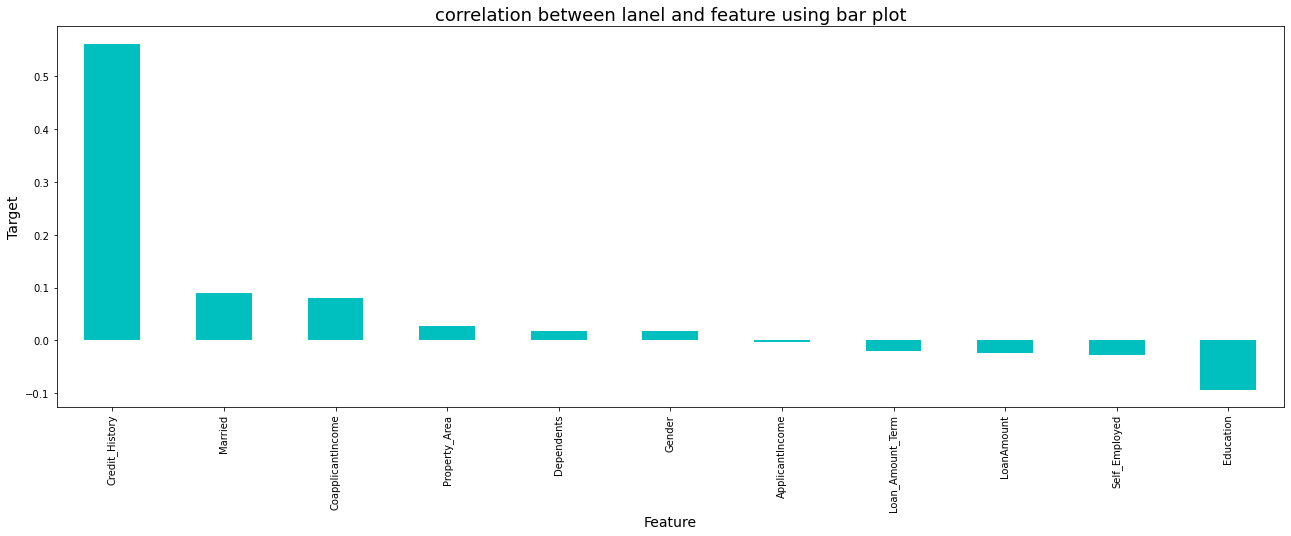

In [99]:
plt.figure(figsize=(22,7))
new_df.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title('correlation between lanel and feature using bar plot',fontsize=18)
plt.show()

Here the columns ApplicantIncome has very less correlation with the target so we can drop this column.

# Separating the features and label variables

In [100]:
x = new_df.drop("Loan_Status", axis=1)
y = new_df["Loan_Status"]

We have separated both dependent and independent variables.

In [101]:
x.shape

(577, 11)

In [102]:
y.shape

(577,)

# Feature Scaling using Standard Scalarization

In [103]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.477137,-1.362511,-0.723313,-0.541961,-0.380580,0.681780,-1.122446,0.000771,0.230853,0.418513,1.227472
1,0.477137,0.733939,0.282353,-0.541961,-0.380580,0.234783,0.744117,0.000771,0.230853,0.418513,-1.306522
2,0.477137,0.733939,-0.723313,-0.541961,2.627567,-0.527201,-1.122446,-1.437336,0.230853,0.418513,1.227472
3,0.477137,0.733939,-0.723313,1.845150,-0.380580,-0.791972,0.895786,-0.153545,0.230853,0.418513,1.227472
4,0.477137,-1.362511,-0.723313,-0.541961,-0.380580,0.728848,-1.122446,0.238260,0.230853,0.418513,1.227472
...,...,...,...,...,...,...,...,...,...,...,...
572,-2.095835,-1.362511,-0.723313,-0.541961,-0.380580,-0.587375,-1.122446,-1.293791,0.230853,0.418513,-1.306522
573,0.477137,0.733939,2.293686,-0.541961,-0.380580,0.035386,-1.122446,-2.332692,-3.243986,0.418513,-1.306522
574,0.477137,0.733939,0.282353,-0.541961,-0.380580,1.281658,0.173344,1.845015,0.230853,0.418513,1.227472
575,0.477137,0.733939,1.288020,-0.541961,-0.380580,1.164426,-1.122446,0.976055,0.230853,0.418513,1.227472


Now the data is scaled using Standard Scalarization method.

In [104]:
y.value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

Here we can notice the class imbalancing issue so lets uae SMOTE to balance the data.

# Oversmapling

In [105]:
# Oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [106]:
y.value_counts()

0    398
1    398
Name: Loan_Status, dtype: int64

The data is balanced now, Since the highest count of the target is 398 so the data is balanced by oversampling all the classes to the count 398.

In [107]:
# DataFrame after preprocessing and data cleaning
new_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,0.681780,-1.122446,0.000771,360.0,1.0,2,1
1,1,1,1,0,0,0.234783,0.744117,0.000771,360.0,1.0,0,0
2,1,1,0,0,1,-0.527201,-1.122446,-1.437336,360.0,1.0,2,1
3,1,1,0,1,0,-0.791972,0.895786,-0.153545,360.0,1.0,2,1
4,1,0,0,0,0,0.728848,-1.122446,0.238260,360.0,1.0,2,1


We have done with the preprocessing and data cleaning. Now let's move to build the model.

# Modeling

### Finding the best random state

In [108]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    DTC = RandomForestClassifier()
    DTC.fit(x_train, y_train)
    pred = DTC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," at Random_state ",maxRS)

Best accuracy is  0.8828451882845189  at Random_state  68


The best accuracy is 88.28% on the Random state 68.

## Creating trian_test_split

In [110]:
 x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state = maxRS)

We have splitted the dataset using best Random State.

# Classification Algorithms

In [111]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

# Decision Tree Classifier

In [112]:
# Checking Accuracy for Decision Tree Classifier
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)
predDTC = DTC.predict(x_test)
print(accuracy_score(y_test, predDTC))
print(confusion_matrix(y_test, predDTC))
print(classification_report(y_test,predDTC))

0.8117154811715481
[[ 82  20]
 [ 25 112]]
              precision    recall  f1-score   support

           0       0.77      0.80      0.78       102
           1       0.85      0.82      0.83       137

    accuracy                           0.81       239
   macro avg       0.81      0.81      0.81       239
weighted avg       0.81      0.81      0.81       239



The accuracy using Decision Tree Classifier is 81.17%.

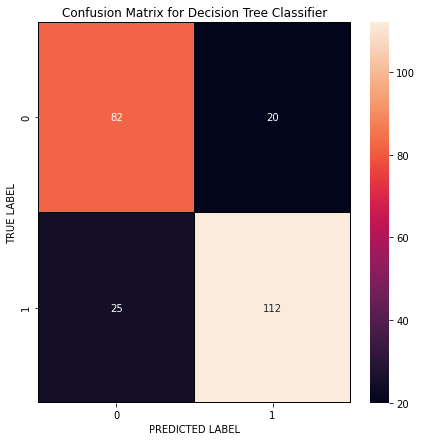

In [114]:
# Lets plot confusion matrix for DTC
cm = confusion_matrix(y_test,predDTC)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax,xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

# RandomForestClassifier

In [115]:
# Checking Accuracy for RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC = RFC.predict(x_test)
print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test,predRFC))

0.8828451882845189
[[ 86  16]
 [ 12 125]]
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       102
           1       0.89      0.91      0.90       137

    accuracy                           0.88       239
   macro avg       0.88      0.88      0.88       239
weighted avg       0.88      0.88      0.88       239



The accuracy using Random Forest Classifier is 88.28%.

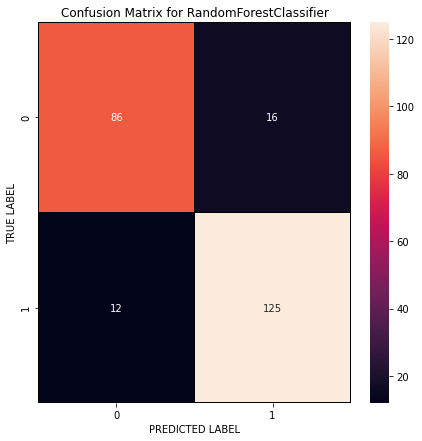

In [116]:
# Lets plot confusion matrix for RandomForestClassifier
cm = confusion_matrix(y_test,predRFC)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax,xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

# LogisticRegression

In [117]:
# Checking Accuracy for LogisticRegression
LR = LogisticRegression()
LR.fit(x_train,y_train)
predLR = LR.predict(x_test)
print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test,predLR))

0.7907949790794979
[[ 63  39]
 [ 11 126]]
              precision    recall  f1-score   support

           0       0.85      0.62      0.72       102
           1       0.76      0.92      0.83       137

    accuracy                           0.79       239
   macro avg       0.81      0.77      0.78       239
weighted avg       0.80      0.79      0.78       239



The accuracy using Logistic Regression Classifier is 79.07%.

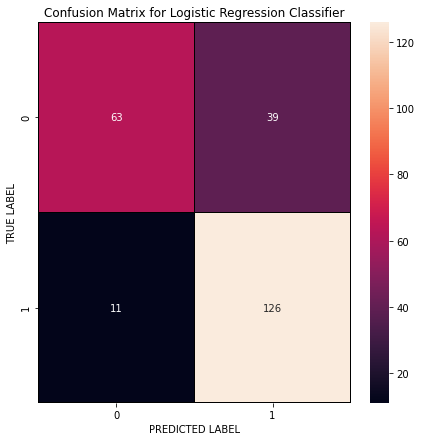

In [119]:
# Lets plot confusion matrix for Logistic Regression
cm = confusion_matrix(y_test,predLR)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax,xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression Classifier')
plt.show()

In [120]:
# Checking Accuracy for Support Vector Machine Classifier
svc = SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test,predsvc))

0.7656903765690377
[[ 62  40]
 [ 16 121]]
              precision    recall  f1-score   support

           0       0.79      0.61      0.69       102
           1       0.75      0.88      0.81       137

    accuracy                           0.77       239
   macro avg       0.77      0.75      0.75       239
weighted avg       0.77      0.77      0.76       239



The accuracy using SVC is 76.56%.

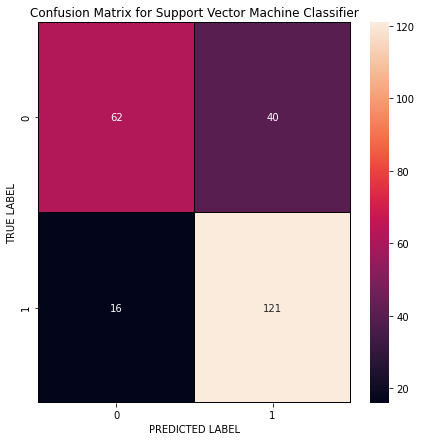

In [121]:
# Lets plot confusion matrix for Support Vector Machine Classifier
cm = confusion_matrix(y_test,predsvc)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax,xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Support Vector Machine Classifier')
plt.show()

# KNeighbors Classifier

In [122]:
# Checking Accuracy for Decision Tree Classifier
knn = KNN()
knn.fit(x_train,y_train)
predknn = knn.predict(x_test)
print(accuracy_score(y_test, predknn))
print(confusion_matrix(y_test, predknn))
print(classification_report(y_test,predknn))

0.7907949790794979
[[ 85  17]
 [ 33 104]]
              precision    recall  f1-score   support

           0       0.72      0.83      0.77       102
           1       0.86      0.76      0.81       137

    accuracy                           0.79       239
   macro avg       0.79      0.80      0.79       239
weighted avg       0.80      0.79      0.79       239



The accuracy using KNeighbors Classifier is 79.07%.

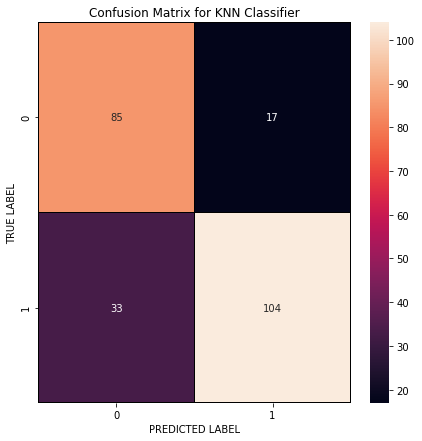

In [123]:

# Lets plot confusion matrix for KNN Classifier
cm = confusion_matrix(y_test,predknn)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax,xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for KNN Classifier')
plt.show()

# Gradient Boosting Classifier

In [124]:
# Checking Accuracy for GradientBoostingClassifier
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB = GB.predict(x_test)
print(accuracy_score(y_test, predGB))
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test,predGB))

0.8493723849372385
[[ 75  27]
 [  9 128]]
              precision    recall  f1-score   support

           0       0.89      0.74      0.81       102
           1       0.83      0.93      0.88       137

    accuracy                           0.85       239
   macro avg       0.86      0.83      0.84       239
weighted avg       0.85      0.85      0.85       239



The accuracy using Gradient Boosting Classifier is 84.93%.

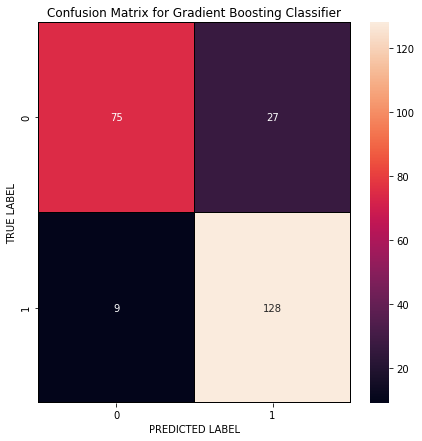

In [125]:
# Lets plot confusion matrix for Gradient Boosting Classifier
cm = confusion_matrix(y_test,predGB)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax,xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show()

# AdaBoost Classifier

In [126]:
# Checking Accuracy for AdaBoostClassifier
ABC = AdaBoostClassifier()
ABC.fit(x_train,y_train)
predABC = ABC.predict(x_test)
print(accuracy_score(y_test, predABC))
print(confusion_matrix(y_test, predABC))
print(classification_report(y_test,predABC))

0.8117154811715481
[[ 77  25]
 [ 20 117]]
              precision    recall  f1-score   support

           0       0.79      0.75      0.77       102
           1       0.82      0.85      0.84       137

    accuracy                           0.81       239
   macro avg       0.81      0.80      0.81       239
weighted avg       0.81      0.81      0.81       239



The accuracy using AdaBoost Classifier is 81.17%.

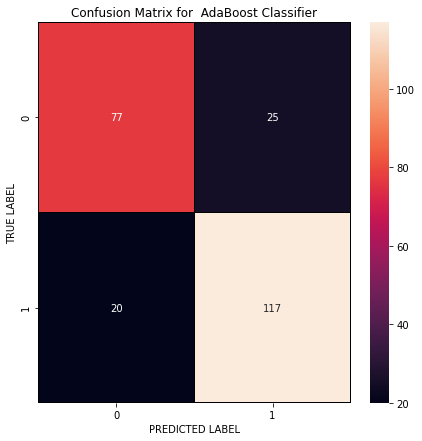

In [127]:
# Lets plot confusion matrix for  AdaBoost Classifier
cm = confusion_matrix(y_test,predABC)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax,xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  AdaBoost Classifier')
plt.show()

# GaussianNB Classifier

In [128]:
# Checking Accuracy for GaussianNB
NB = GaussianNB()
NB.fit(x_train,y_train)
predNB = NB.predict(x_test)
print(accuracy_score(y_test, predNB))
print(confusion_matrix(y_test, predNB))
print(classification_report(y_test,predNB))

0.7824267782426778
[[ 51  51]
 [  1 136]]
              precision    recall  f1-score   support

           0       0.98      0.50      0.66       102
           1       0.73      0.99      0.84       137

    accuracy                           0.78       239
   macro avg       0.85      0.75      0.75       239
weighted avg       0.84      0.78      0.76       239



The accuracy using GaussianNB Classifier is 78.24%

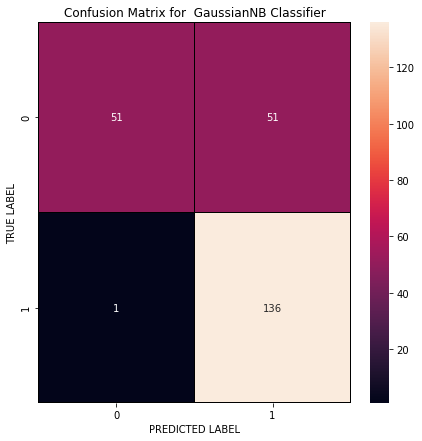

In [129]:
# Lets plot confusion matrix for  AdaBoost Classifier
cm = confusion_matrix(y_test,predNB)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax,xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  GaussianNB Classifier')
plt.show()

# Checking the Cross Validation Score

In [130]:
from sklearn.model_selection import cross_val_score

In [131]:
# cv score for Decision Tree Classifier
print(cross_val_score(DTC,x,y,cv=5).mean())

0.7751965408805032


In [132]:
# cv score for Random Forest Classifier
print(cross_val_score(RFC,x,y,cv=5).mean())

0.8330110062893084


In [134]:
# cv score for Logistic Regression Classifier
print(cross_val_score(LR,x,y,cv=5).mean())

0.7312028301886793


In [135]:
# cv score for Support Vector Machine Classifier
print(cross_val_score(svc,x,y,cv=5).mean())

0.7475157232704402


In [136]:
# cv score for KNN Classifier
print(cross_val_score(knn,x,y,cv=5).mean())

0.7500314465408804


In [137]:
# cv score for Gradient Boosting Classifier
print(cross_val_score(GB,x,y,cv=5).mean())

0.8016352201257861


In [138]:
# cv score for AdaBoosting Classifier
print(cross_val_score(ABC,x,y,cv=5).mean())

0.7525864779874214


In [139]:
# cv score for GaussianNB Classifier
print(cross_val_score(NB,x,y,cv=5).mean())

0.728694968553459


### The difference between accuracy score and cross validation score for the models used

* Decision Tree Classifier = 3.66%
* Random Forest Classifier = 4.98%
* Logistic Regression = 5.95%
* SVC = 1.81%
* KNeighbors Classifier = 4.00%
* Gradient Boosting Classifier = 4.77%
* Adaboost Classifier = 5.92%
* GaussianNB Classifier = 5.38%

From the difference between the accuracy score and the cross validation score we can conclude that **Support Vector Machine Classifier** as our best fitting model whch is giving very less difference compare to other models.

# Hyper Parameter Tuning

In [140]:
from sklearn.model_selection import GridSearchCV

In [154]:
#  Support Vector Machine Classifier

parameters = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['linear','poly', 'rbf', 'sigmoid'],
              'decision_function_shape':['ovo', 'ovr']}

In [155]:
GCV=GridSearchCV(SVC(),parameters,cv=5)

In [156]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [157]:
GCV.best_params_

{'C': 10, 'decision_function_shape': 'ovo', 'gamma': 1, 'kernel': 'rbf'}

In [158]:
Loan = SVC(C=10, decision_function_shape='ovo', gamma=1, kernel='rbf')
Loan.fit(x_train, y_train)
pred = Loan.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

83.68200836820083


The accuracy of best model increased after tuning and giving 83.68% which is very good.

# Plotting ROC and compare AUC for all the models used

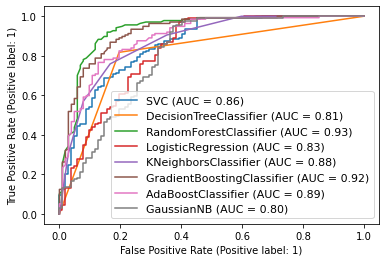

In [160]:
# Plotting for all the models used here
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve 


disp = plot_roc_curve(svc,x_test,y_test)
plot_roc_curve(DTC, x_test, y_test, ax=disp.ax_)     # ax_=Axes with confusion matrix
plot_roc_curve(RFC, x_test, y_test, ax=disp.ax_)
plot_roc_curve(LR, x_test, y_test, ax=disp.ax_)
plot_roc_curve(knn, x_test, y_test, ax=disp.ax_)
plot_roc_curve(GB, x_test, y_test, ax=disp.ax_)
plot_roc_curve(ABC, x_test, y_test, ax=disp.ax_)
plot_roc_curve(NB, x_test, y_test, ax=disp.ax_)

plt.legend(prop={'size':11}, loc='lower right')
plt.show()


This is the AUC-ROC curve for the models that we have used and is plotted False positive rate against True positive rate.

### Plotting ROC and Compare AUC for the best model SupportVectorMachine Classifier(SVC)

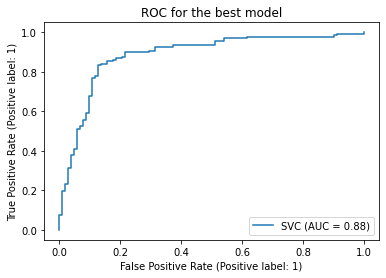

In [162]:
# Let's check the Auc for the best model after hyper parameter tuning
plot_roc_curve(Loan, x_test, y_test)
plt.title("ROC for the best model")
plt.show()

This is the ROC curve for the best model SVC and AUC for SVC is 88%.

# Saving The Model

In [163]:
# Saving the model using .pkl
import joblib
joblib.dump(Loan,"Loan_Application_Status.pkl")

['Loan_Application_Status.pkl']

# Predicting the saved model

In [164]:
# Let's load the saved model and get the prediction

# Loading the saved model
model=joblib.load("Loan_Application_Status.pkl")

#Prediction
prediction = model.predict(x_test)
prediction

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1])

These are the predicted loan approval status of the applicants.

In [166]:
pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

,0,1,2,3,4,5,6,7,8,9,...,229,230,231,232,233,234,235,236,237,238
Predicted,0,1,1,1,0,1,1,0,1,1,...,1,0,0,1,1,0,0,0,0,1
Original,0,1,1,1,0,1,1,0,1,1,...,1,0,0,1,0,0,0,0,1,1
